## Visualizing cities and areas in the graph for TSP

The data sets for this visualization are taken from this contest: https://travellingsalesman.kiwi.com/. 

Cities are colored according to the color of an area they belog to. Each area is to be visited.

I'm using NetworkX https://networkx.github.io/ to visualize the graph.

It's useful to look at the visualized data before selecting an algorithm for TSP. 

In [40]:
import networkx as nx
import matplotlib.pyplot as plt
import os

#### 1. Read and process input data

In [41]:
def prepare_data(filename):
    city_id, city_to_id = 0, {}
    cities_by_areas, edges = [], []
    
    with open(filename) as fh:
        n = int(fh.readline().split()[0])
        
        for area_id in range(n):
            _ = fh.readline().strip().split()
            cities_in_area = fh.readline().strip().split()
            areas[area_id] = []

            for city in cities_in_area:
                city_to_id[city] = city_id
                cities_by_areas.append((city_id, area_id))
                city_id += 1

        lines = fh.readlines()
        for line in lines:
            f, t, _, _ = tuple(line.split())
            edges.append((city_to_id[f], city_to_id[t]))

    return cities_by_areas, edges

#### 2. Build and visualize the graph

##### Example 1. 

We see that each city represents different area, cities are quite connected.

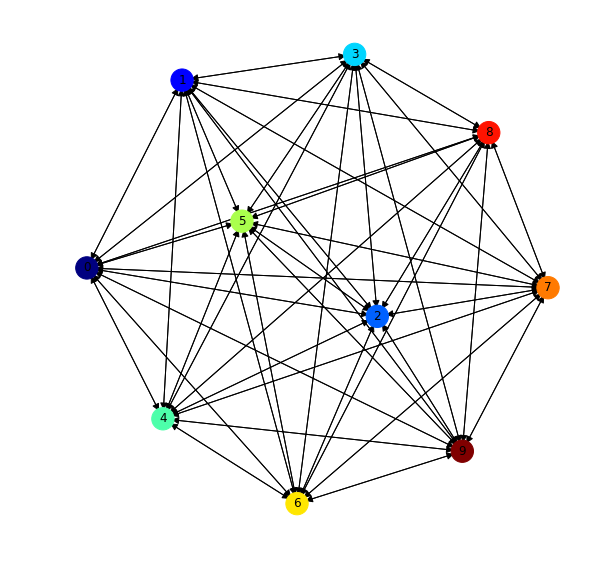

In [50]:
cities_by_areas, edges = prepare_data(filename = os.getcwd() + '/data1.txt')

fig = plt.figure(figsize=(10,10))

G = nx.DiGraph()
G.add_edges_from(edges)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, cmap=plt.get_cmap('jet'), node_color = [x[1] for x in cities_by_areas], node_size = 500)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, arrowsize=15, arrows=True)

plt.axis('off')
plt.savefig("graph1.png", format="PNG")
plt.show()

##### Example 2. 

We see that the graph is quite dense in the middle. It also has many leaves outgoing from the dense middle. This will make it harder for some algorithms to find optimal (given the task from the contest) paths.

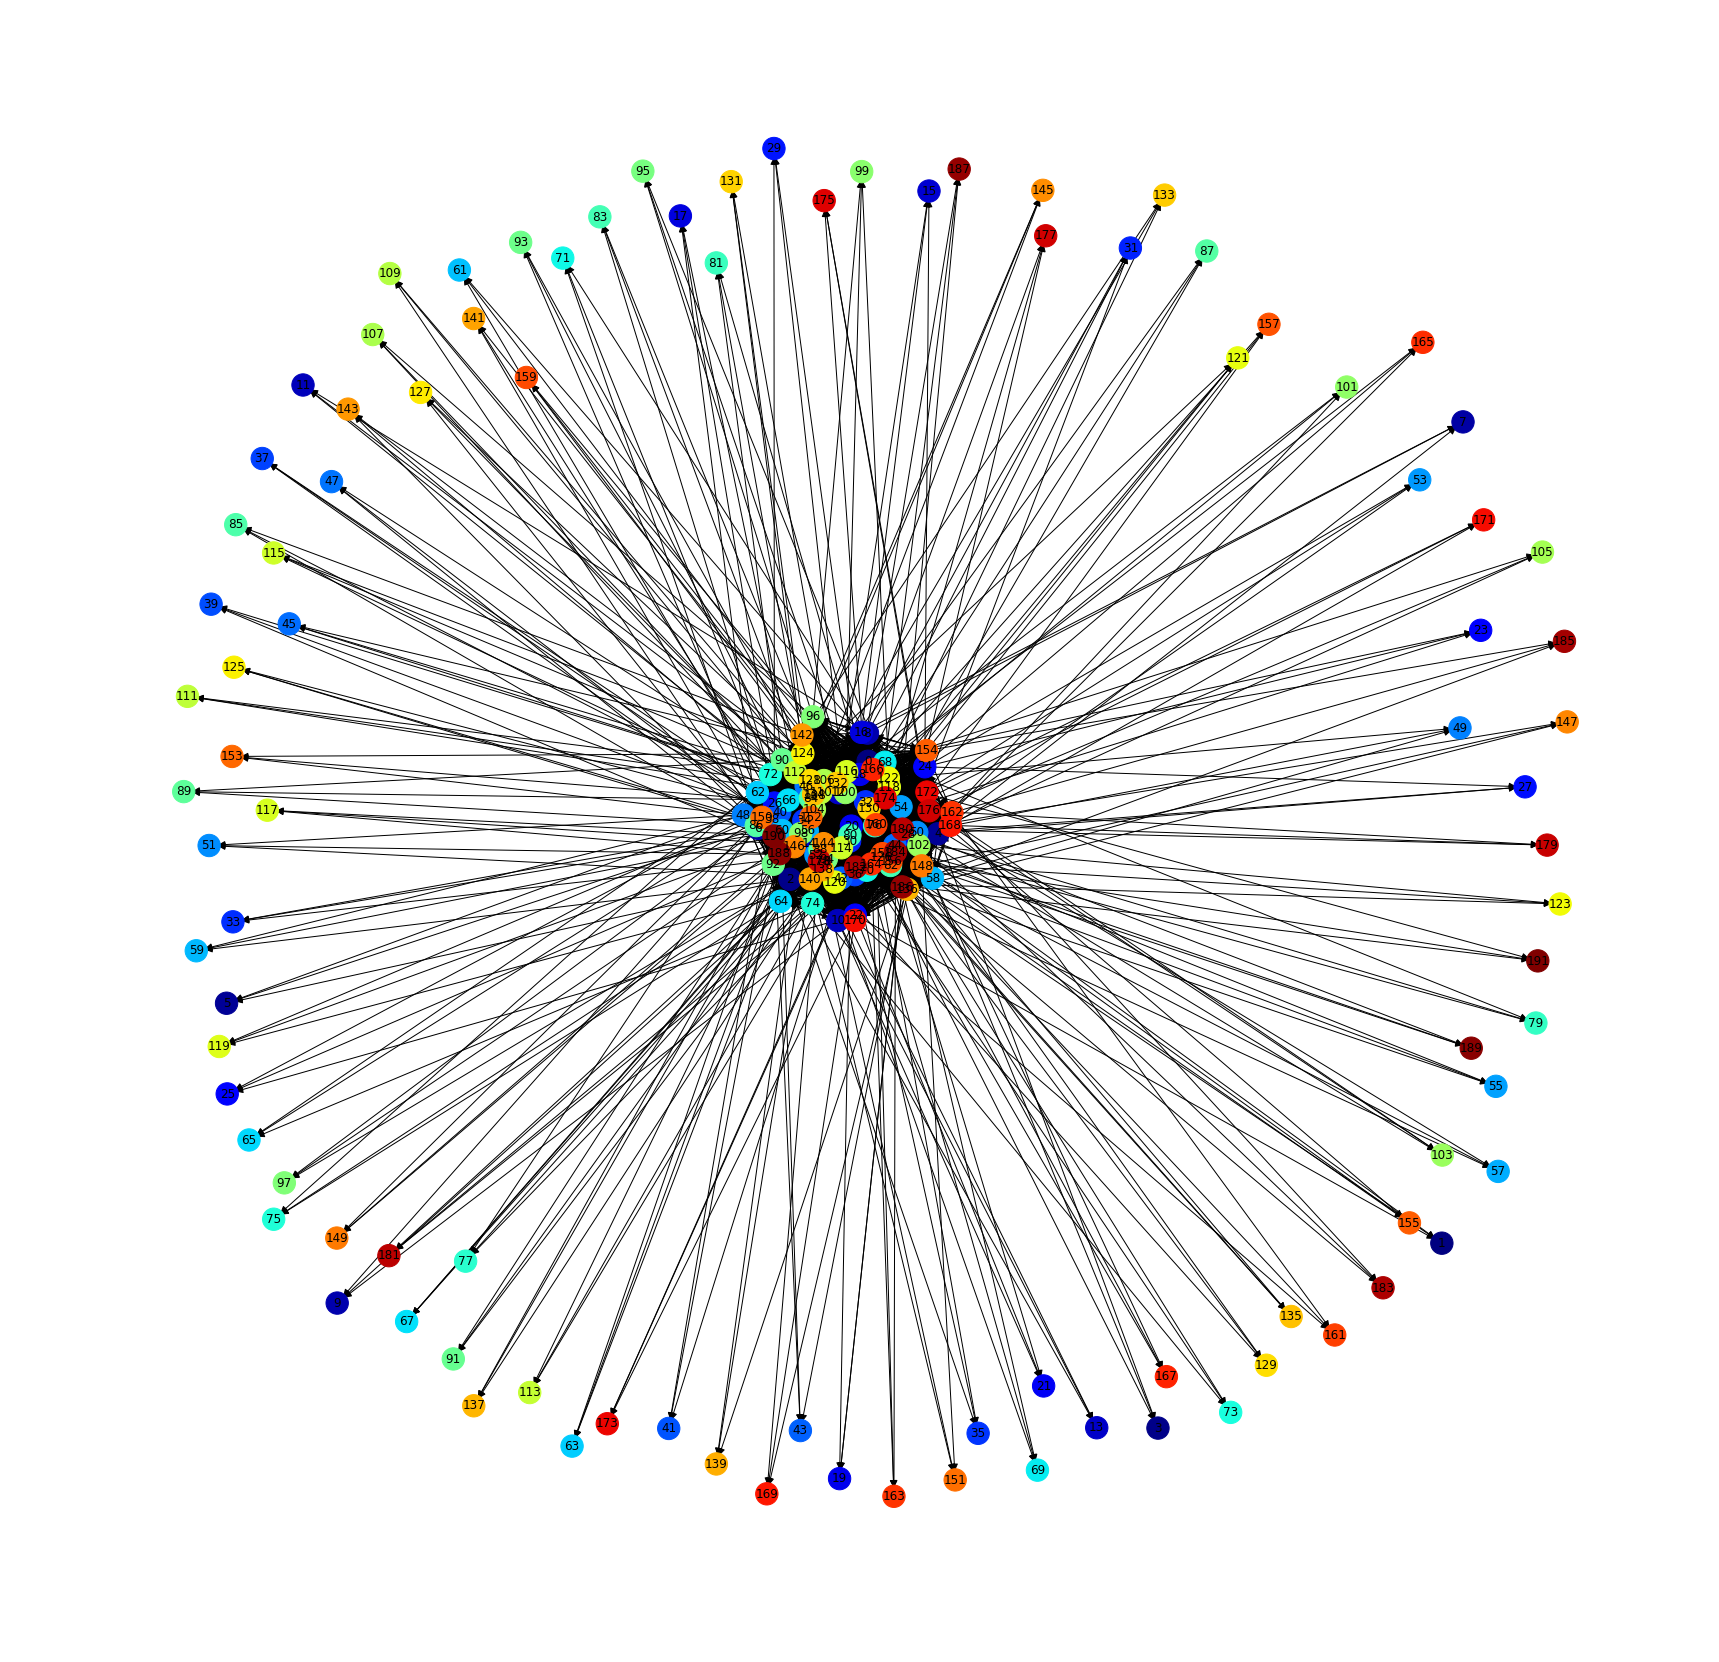

In [51]:
cities_by_areas, edges = prepare_data(filename = os.getcwd() + '/data2.txt')

fig = plt.figure(figsize=(30,30))

G = nx.DiGraph()
G.add_edges_from(edges)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, cmap=plt.get_cmap('jet'), node_color = [x[1] for x in cities_by_areas], node_size = 500)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, arrowsize=15, arrows=True)

plt.axis('off')
plt.savefig("graph2.png", format="PNG")
plt.show()

Similarly, we can visualize other data sets from the contest. We'll see that some of them are really big and dense. 